# CIS 678 - Machine Learning - Kaggle Challenge 3: MNIST Digit Classification

<!-- ## Data Loading -->

<!-- ## Model Implementation -->

<!-- ## Model Evaluation -->

<!-- ## Conclusion -->

## Notebook Configuration
Before running our model, let's change our working directory over to our Python scripts by running the following shell script:

In [1]:
!echo sourcing MNIST model directory...
%cd '../model/src/'

sourcing MNIST model directory...
/Users/jppalacios/academic/fall2023/cis678/ml-challenge-3/model/src


## Importing our Custom Neural Network Libraries
Now that were are under the right directory, let's start off by importing all of our custom Python scripts.

In [2]:
import numpy as np

# custom modules
from toolkit import Toolkit
from parameters import ParameterManager
from model import Model

# used for visualizing our training progress
from rich.progress import track

# creating our notebook toolkit helper
tools = Toolkit()
tools.configure(name = 'Notebook', level = 'DEBUG')

Notebook - DEBUG - ready to report messages


## Load in Data
This model will train on the MNIST data set.
A collection of three `csv` files are imported to generate our training and testing data sets.
Let's load in our `mnist_train.csv`, `mnist_train_targets.csv`, and `mnist_test.csv` files.


Notebook - INFO - loading in our MNIST data sets
Notebook - INFO - read in our data with shapes: (60000, 784) and (60000, 1) 
Notebook - INFO - read in our data with shapes: (10000, 784) and (10000, 1) 
Notebook - INFO - applying normalization to our train data
Notebook - INFO - visualizing a few MNIST training samples...


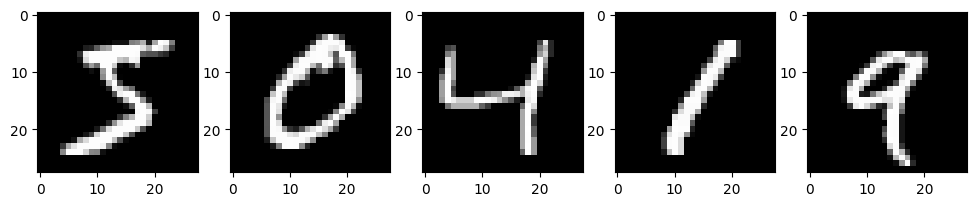

Notebook - INFO - visualizing a few MNIST testing samples...


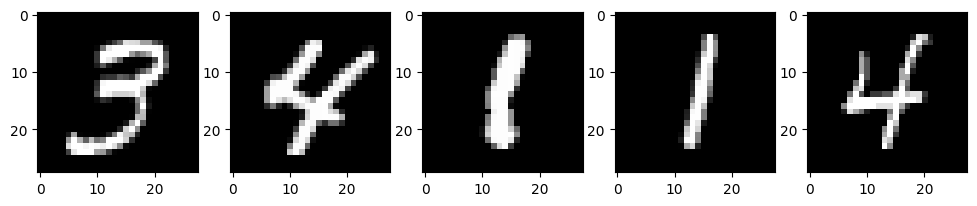

Notebook - WARNING - plots should be labaled!


In [3]:
tools.info("loading in our MNIST data sets")

train_data    = tools.load_data("../data/train/mnist_train.csv")
train_targets = tools.load_data("../data/train/mnist_train_targets.csv", transpose = False)
test_data     = tools.load_data("../data/test/mnist_test.csv")
test_targets  = np.zeros((test_data.shape[0], 1), dtype=int)

tools.info(f"read in our data with shapes: {train_data.shape} and {train_targets.shape} ")
tools.info(f"read in our data with shapes: {test_data.shape} and {test_targets.shape} ")

tools.info("applying normalization to our train data")
train_data = tools.normalize(train_data)
test_data  = tools.normalize(test_data)

tools.info("visualizing a few MNIST training samples...")
tools.visualize(train_data)

tools.info("visualizing a few MNIST testing samples...")
tools.visualize(test_data)

tools.warning("plots should be labaled!")

## Parameter Configuration
Parameter selection is model development makes it easier to optimize our model.
For example, if we can tune our model's learning rate value and see its effects on model performance.
Using our custom `ParameterManager` class, we can easily create a variety of parameters to pass onto our MNIST model.

In [4]:
# hyper-parameter manager
parameters = ParameterManager()

# create learning parameters
parameters.add_parameter(epochs = [20])
parameters.add_parameter(learning_rate = [0.01])

# create an architecture parameter
parameters.add_nested_parameter(hidden_layers = [2], hidden_dimensions = [128, 64, 32], activation = ['tanh'])

tools.debug(f'showing notebook parameters: {parameters}')

Notebook - DEBUG - showing notebook parameters: 
 test cases:
	case 1: {'epochs': 20, 'learning_rate': 0.01, 'hidden_layers': 2, 'hidden_dimensions': [(784, 128), (128, 64), (64, 10)], 'activation': ('tanh', 'tanh', 'softmax')}



## MNIST Model Configuration and Compilation
With our training and testing data sets ready for processing and all of our tunable parameters declared, we can start compiling our custom neural architecture.

In [5]:
mnist_model = Model(debug_mode = False)

mnist_model.configure(parameters = parameters)

mnist_model.fit(train_data, train_targets)


MNIST Model - INFO - model configured
MNIST Model - INFO - training test case 1 of 1 for 20 epochs, learning rate is 0.01 
MNIST Model - INFO - 
Model Summary:
	layer 0: Input layer shape: ((784, 784)), activation: none
	layer 1: Fully Connected layer shape: ((784, 128)), activation: Tanh
	layer 2: Fully Connected layer shape: ((128, 64)), activation: Tanh
	layer 3: Output layer shape: ((64, 10)), activation: Softmax

MNIST Model - INFO - epoch 1/20, error = 26.78157837258654
MNIST Model - INFO - epoch 2/20, error = 26.781199999999938
MNIST Model - INFO - epoch 3/20, error = 26.781199999999938
MNIST Model - INFO - epoch 4/20, error = 26.781199999999938
MNIST Model - INFO - epoch 5/20, error = 26.781199999999938
MNIST Model - INFO - epoch 6/20, error = 26.781199999999938
MNIST Model - INFO - epoch 7/20, error = 26.781199999999938
MNIST Model - INFO - epoch 8/20, error = 26.781199999999938
MNIST Model - INFO - epoch 9/20, error = 26.781199999999938
MNIST Model - INFO - epoch 10/20, error

## Assessing Model Performance
The following section describes our model performance over all parameter variations

In [6]:
# scores = mnist_model.evaluate(test_data, test_targets)

# reporting our highest score with parameters
# tools.info(f'high score of {scores['accuracy']} ran with parameters {scores['parameters']}')

# tools.info("saving our test targets")

# tools.save_data("../data/test/mnist_test_targets.csv", test_targets)